In [3]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm

%matplotlib inline

In [4]:
# Loading Data Set
df_properties=pd.read_csv("C:\\Users\\Sarah Hamid\\Desktop\\properties_data.csv")
df_properties.head(5)


,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [5]:
df_properties

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,...,False,True,True,True,True,True,True,True,True,True
1901,7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,...,False,False,True,True,False,False,False,False,True,True
1902,7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,...,False,False,False,True,False,False,False,False,False,False
1903,7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,Medium,...,False,True,True,True,False,False,False,False,True,True


#### Examining Property Price

In [4]:
# Price Analysis
df_properties['price'].describe()


count    1.905000e+03
mean     2.085830e+06
std      2.913200e+06
min      2.200000e+05
25%      8.900000e+05
50%      1.400000e+06
75%      2.200000e+06
max      3.500000e+07
Name: price, dtype: float64

Looking at the statistical description of the property prices we can conlude that:
-There are 1906 properties included in the dataset
-The prices of the properties range from AED 220,000 to 35 Million AED, where the cheapest peroperty is AED 220,000 and the       most expensive one is 35 Million AED
-The avarge price of the properties is AED 2,085,830


C:\Users\Sarah Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


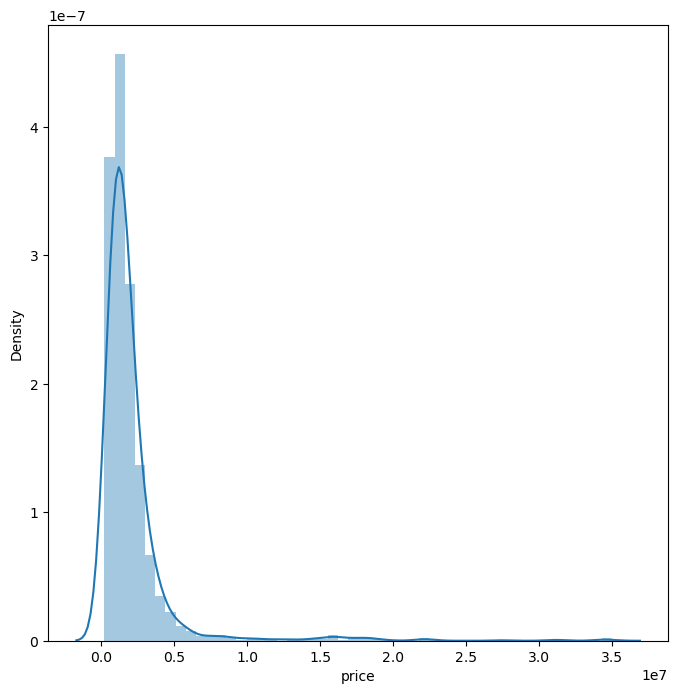

In [5]:
#price distribution 
fig, ax = plt.subplots(figsize = (8, 8))

sns.distplot(df_properties['price']);

Let's check Skewness and Kurtosis and their impact on our analysis, and ultimately prediction models

In [6]:
print("Skewness: %f" % df_properties['price'].skew())
print("Kurtosis: %f" % df_properties['price'].kurt())

Skewness: 6.147403
Kurtosis: 48.856572


As we can see that our data is highly skewed and shows a long-tail positive skewness. This uneven distribution is will harm our analysis and prediction model.

Lets split our dataset in to two parts. We can see from above distribution plot that our tail starts at about 5 Million price point. So lets see how many properties we have under 5 Million and how many above?

In [7]:
df_properties_l5M=df_properties[df_properties['price']<5000000]
df_properties_g5M=df_properties[df_properties['price']>5000000]

In [8]:
df_properties_l5M['price'].describe()

count    1.816000e+03
mean     1.587953e+06
std      9.508697e+05
min      2.200000e+05
25%      8.575000e+05
50%      1.389950e+06
75%      2.043860e+06
max      4.996000e+06
Name: price, dtype: float64

In [9]:
df_properties_g5M['price'].describe()

count    8.900000e+01
mean     1.224476e+07
std      7.448623e+06
min      5.045846e+06
25%      5.876888e+06
50%      9.209000e+06
75%      1.620000e+07
max      3.500000e+07
Name: price, dtype: float64

After splitting our properties,price above 5 million AED and price below 5 million AED and then preforming descriptive analysis.We are able to conlude there are 1817 properities that are priced below 5 million AED and there are only 90 properities that are pric

As said before, this drastice variance will hurt our model, as we could get a property from the tail section dominating our training dataset with its 35 million price.

Now, we have option. We either perform a LOG conversion and handle our data, or we can merely eliminate the 90 outliers which are tainting our dataset.

Let's go with easy one and just eliminate the 90 properties, as we still have substantial number of properties still left in our dataset.ed above 5 million AED.  


In [10]:
df_properties=df_properties[df_properties['price']< 5000001]

Let's plot the distribution plot again and see the impact

C:\Users\Sarah Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

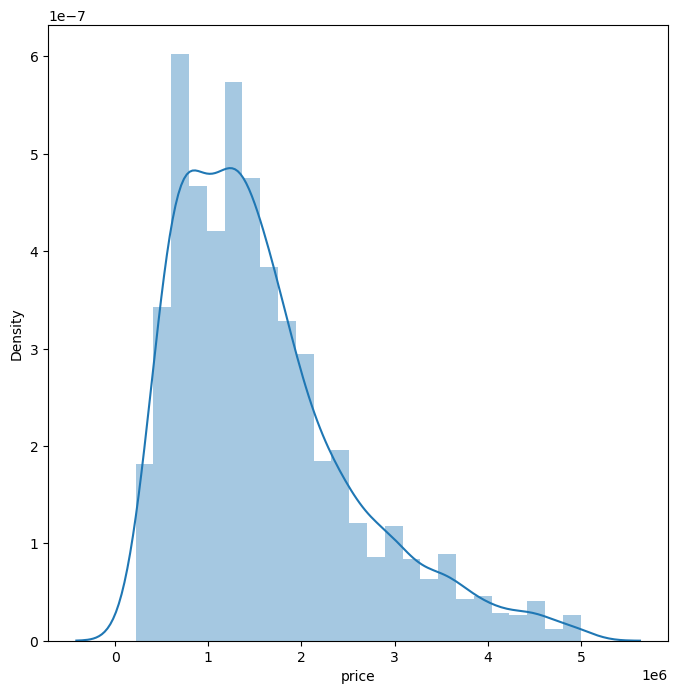

In [11]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.distplot(df_properties.price)

Let's check Skewness and Kurtosis 

In [12]:
print("Skewness: %f" % df_properties['price'].skew())
print("Kurtosis: %f" % df_properties['price'].kurt())

Skewness: 1.141478
Kurtosis: 1.067956


Although our skewness is still above 1, it is in much better state than earlier skewness of 6+

Let's move forward and see relationship of price against other features associated with property.

#### Price vs Location

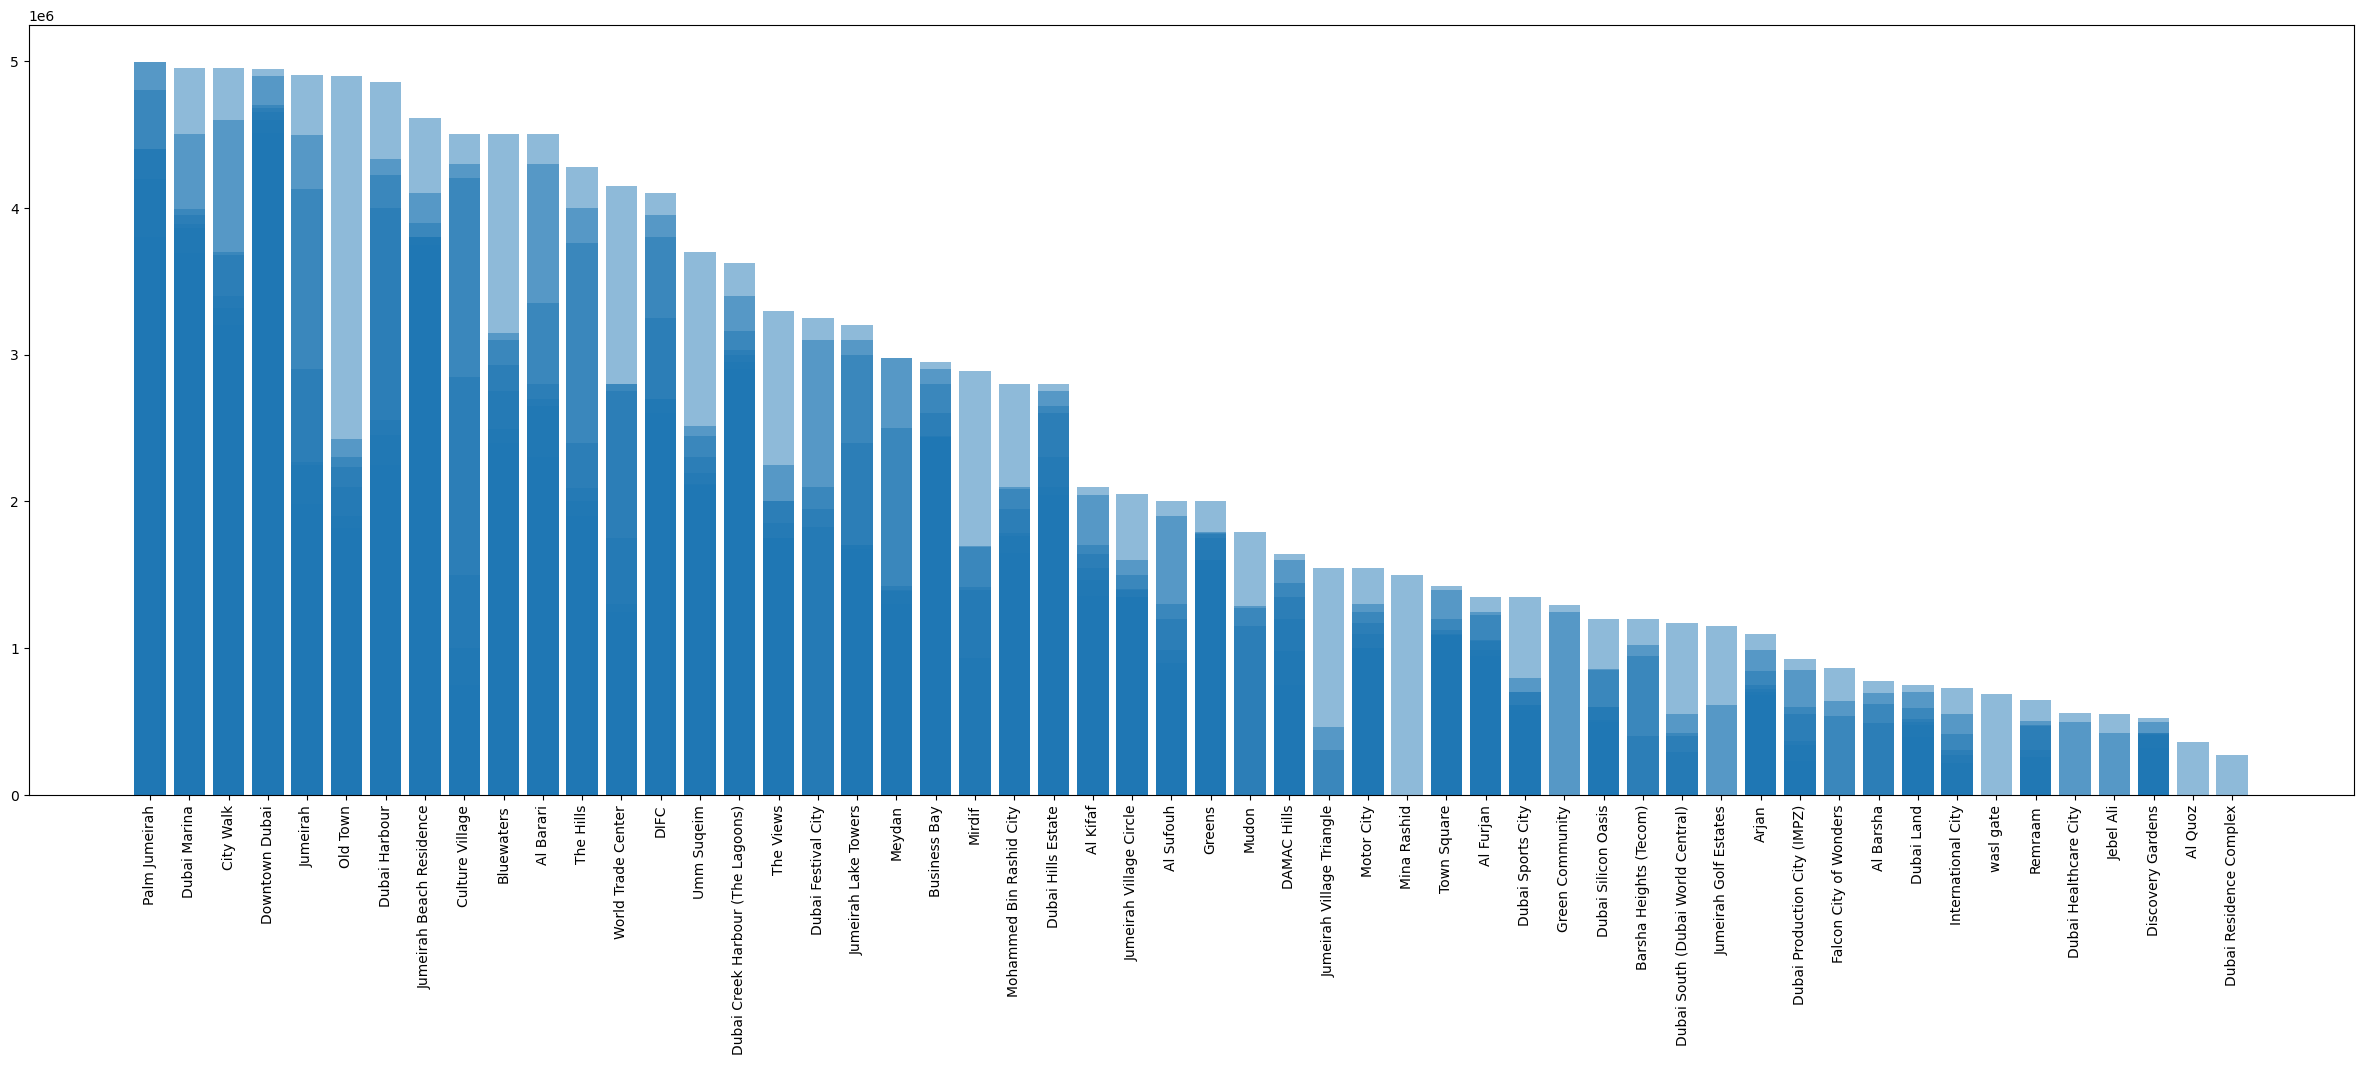

In [13]:
df_location_price=df_properties[['price','neighborhood']].sort_values(by=['price'],ascending=False)
plt.figure(figsize=(30,10))
plt.bar(df_location_price['neighborhood'],df_location_price['price'],align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.show()

Observing the bar chart above we can conclude that the most expensive properties are located in Palm Jumeirah and the most cheapest properties are found in Dubai Residence Complex.

#### Price per Sqft vs Location

Let's see the most expensive areas in Dubai based on price per square footage.

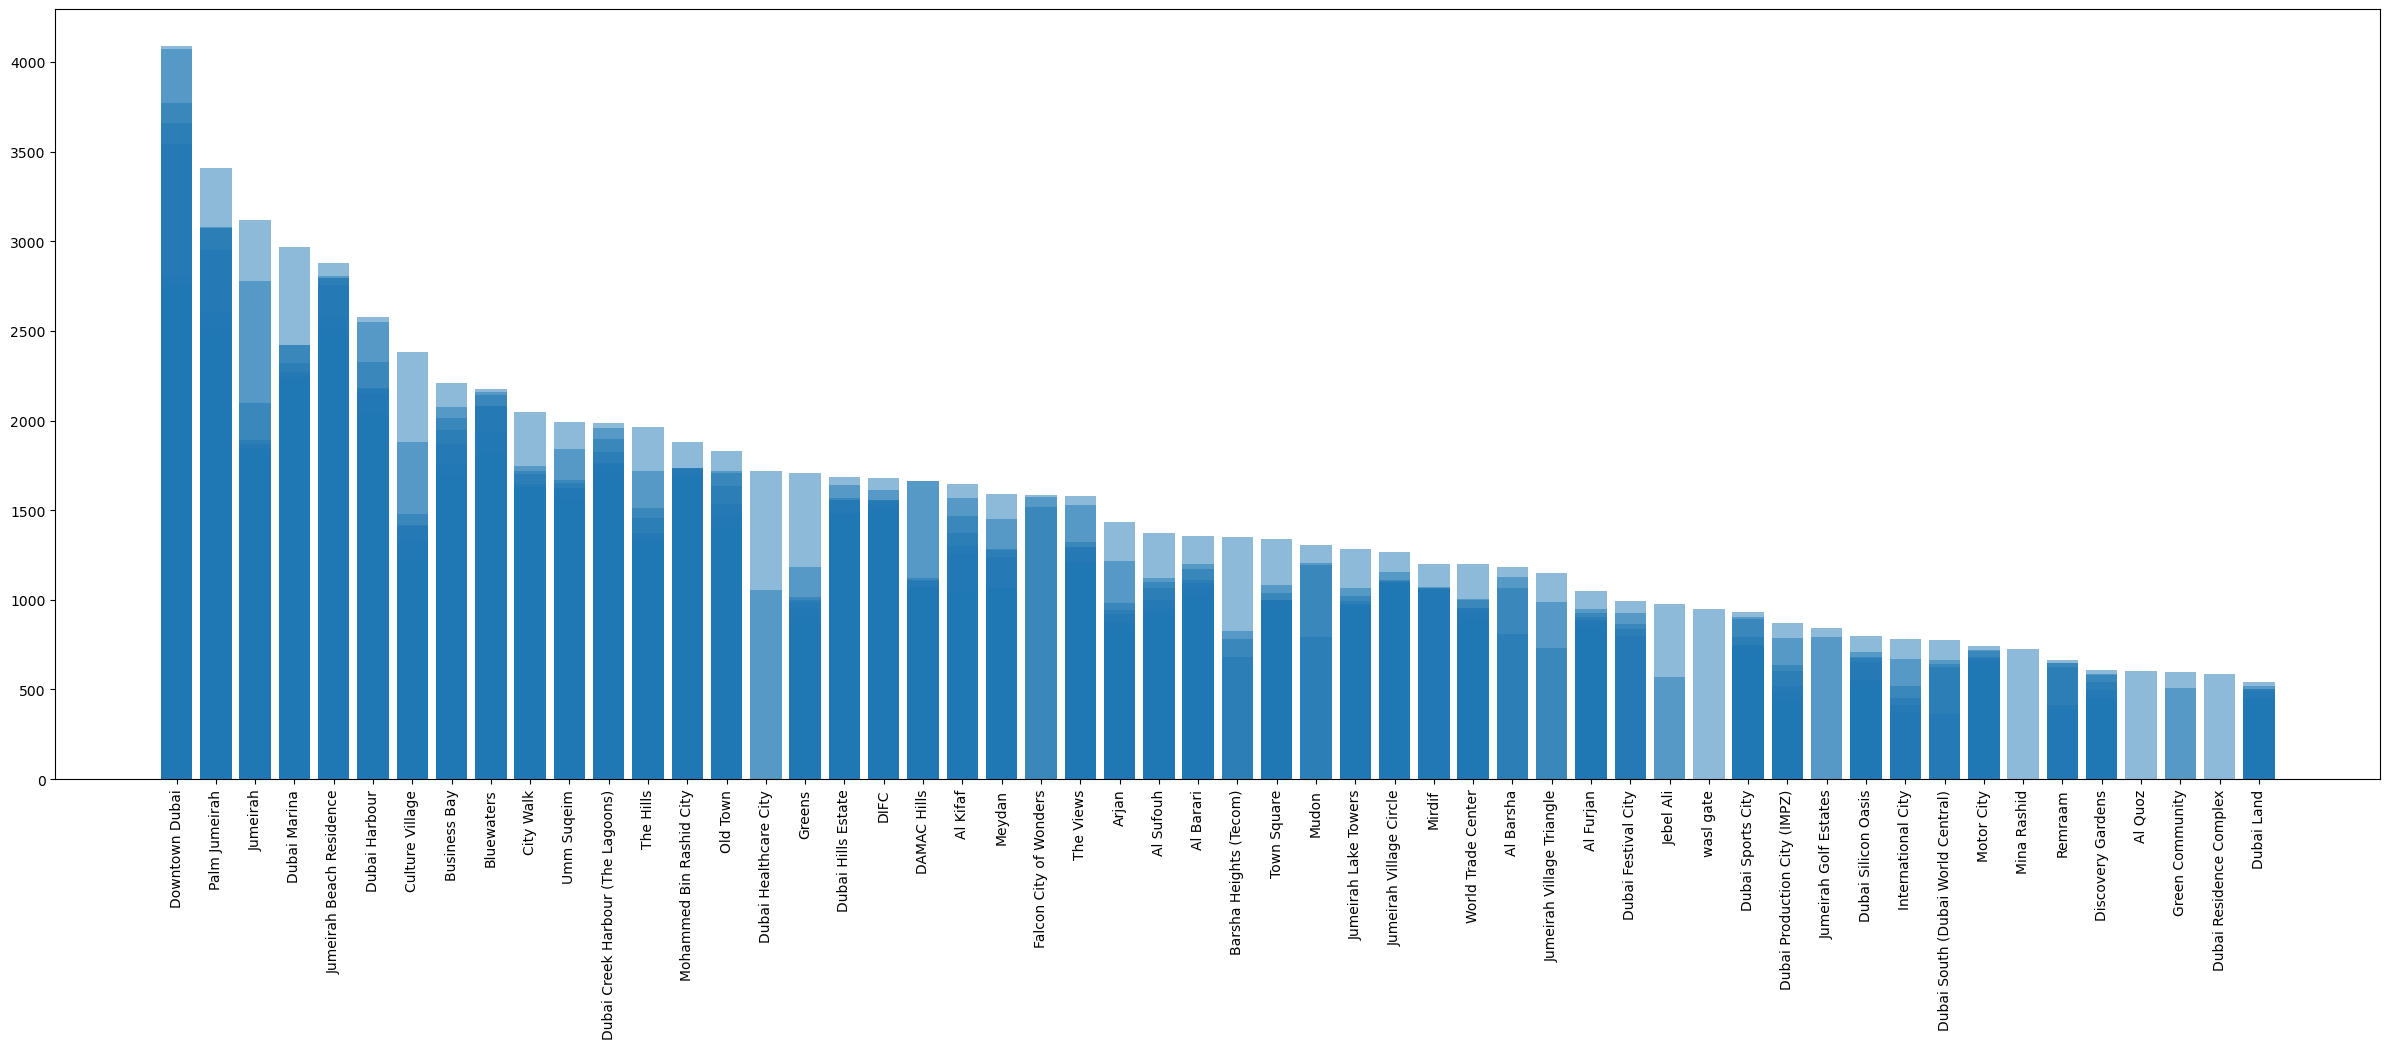

In [14]:
df_price_sqft_location=df_properties[['price_per_sqft', 'neighborhood']].sort_values(by=['price_per_sqft'],ascending=False)
plt.figure(figsize=(30,10))
plt.bar(df_price_sqft_location['neighborhood'],df_price_sqft_location['price_per_sqft'],align='center',alpha=0.5)
plt.xticks(rotation='vertical')
plt.show()

Observing the bar chart above we can conclude that the most expensive per Sqft properties are located in Downtown Dubai and the most cheapest  per Sqft properties are found in Dubai Land.

#### Price vs Area

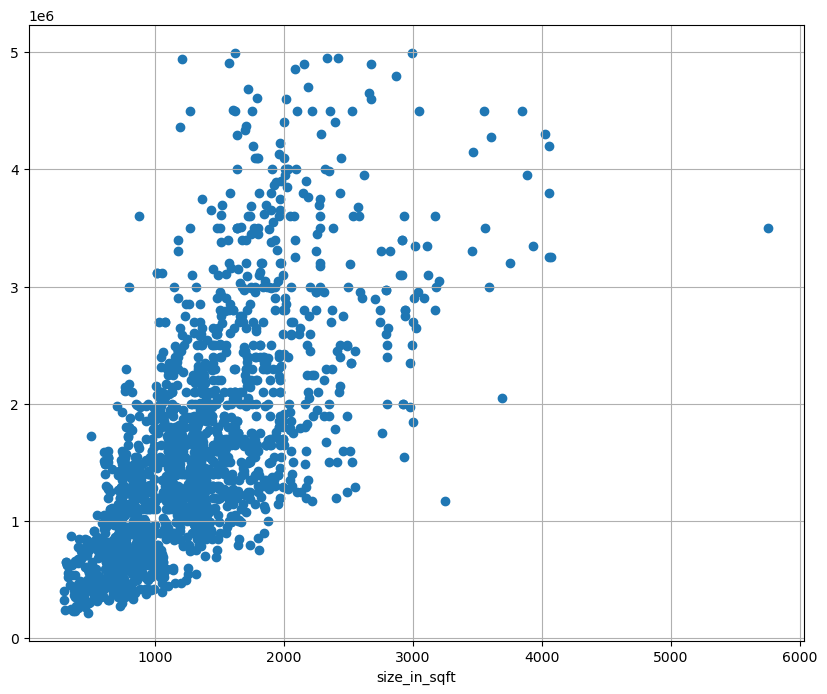

In [15]:
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(df_properties['size_in_sqft'], df_properties['price'])
plt.xlabel('size_in_sqft')
plt.grid(True)

By observing the scatter plot above we can conclude that as the size increases the price will most likely also increase. 

#### Price vs Number of Bedroom(s)

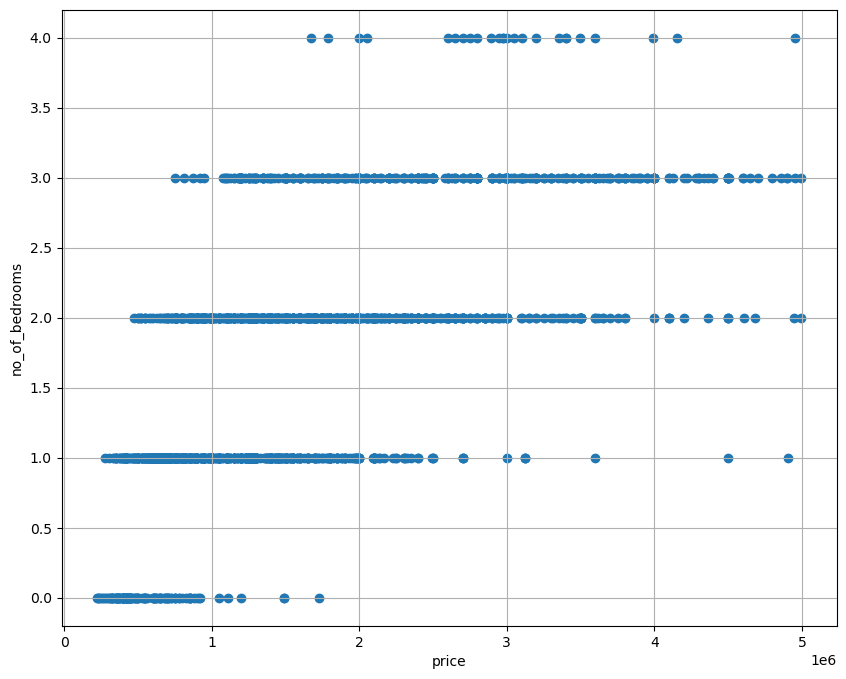

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(df_properties['price'],df_properties['no_of_bedrooms'])
plt.xlabel('price')
plt.ylabel('no_of_bedrooms')
plt.grid(True)

We can see that:

We have 1 bedroom apartments ranging upto 5 million, most probably because of its location.
We have 2 bedrooms apartments ranging from sub 1 million to upto 5 million.
We have 3 bedrooms apartments ranging from 1 million to up 5 million.

#### Bedrooms vs Bathrooms

<function matplotlib.pyplot.show(close=None, block=None)>

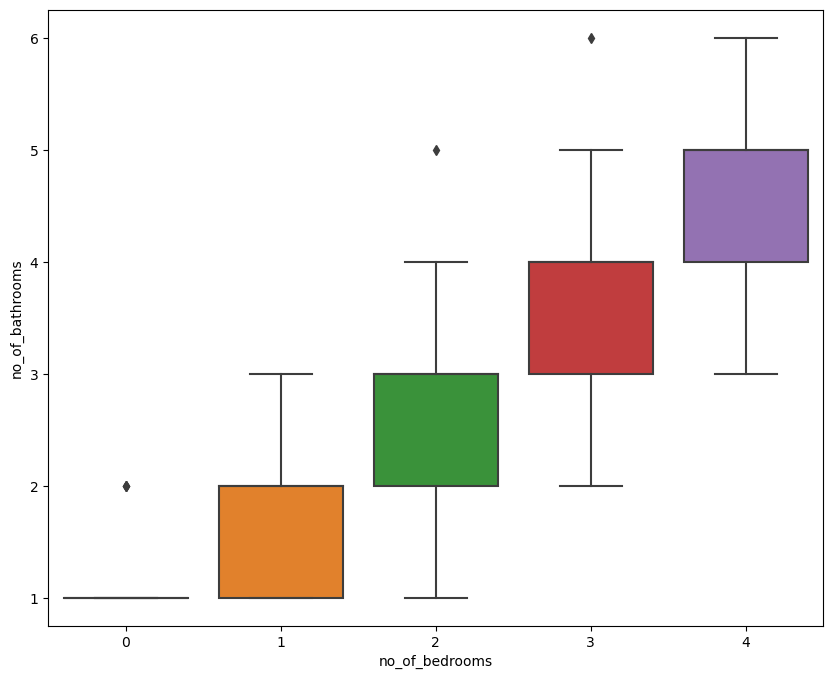

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x='no_of_bedrooms', y='no_of_bathrooms', data = df_properties)
plt.show

Well this is obvious:

0 bedroom units, i.e. studio apartment; will always have 1 bathroom
1 bedroom apartment have 1 to 2 bathrooms
2 bedrooms apartment have 2 to 3 bathrooms
3 bedrooms apartment have 3 to 4 bathrooms
4 bedrooms apartment have 4 to 5 bathrooms
There are few cases in studio, 2 bedroom, and 3 bedroom units having more bathrooms, as depicted by outliers.

#### Overall Correlation

Let's examine the overall correlation of features in our dataset 

In [18]:
df_properties_corr = df_properties.copy()
df_properties_corr.drop(['id', 'latitude', 'longitude'], axis=1, inplace=True)

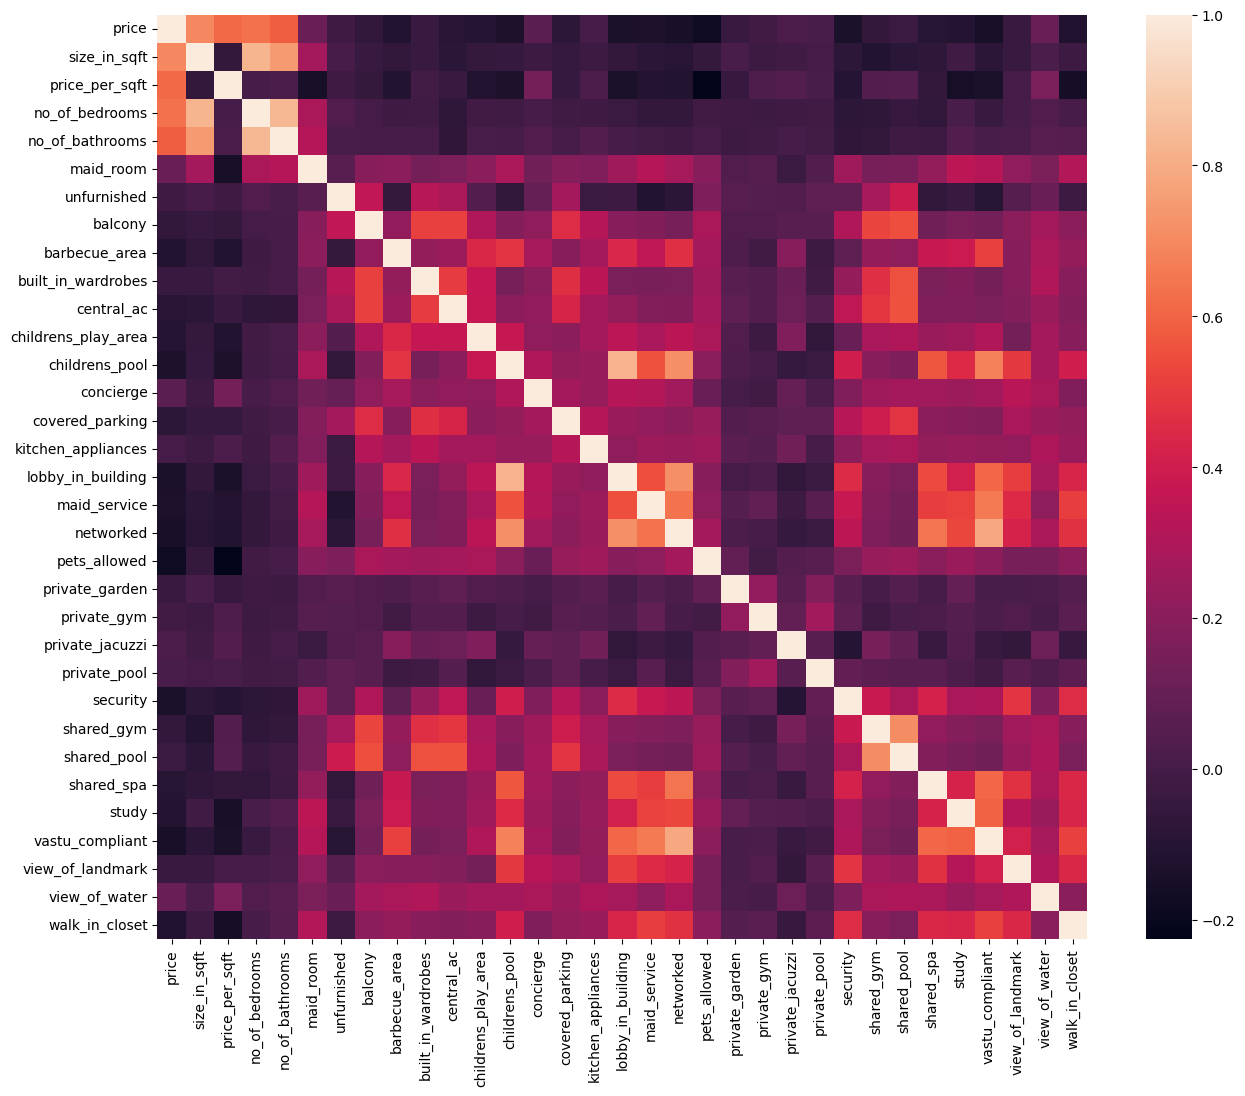

In [21]:
fig, ax = plt.subplots(figsize=(15, 12))

corr_matrix = df_properties_corr.corr()
sns.heatmap(corr_matrix, annot = False)
plt.show()

In [45]:
corr_pairs=corr_matrix.unstack().sort_values(ascending=False)
corr_pairs[corr_pairs != 1.0].head(20).drop_duplicates()


no_of_bathrooms    no_of_bedrooms     0.834847
no_of_bedrooms     size_in_sqft       0.824368
lobby_in_building  childrens_pool     0.818513
networked          vastu_compliant    0.786834
no_of_bathrooms    size_in_sqft       0.747141
lobby_in_building  networked          0.717278
childrens_pool     networked          0.715110
shared_gym         shared_pool        0.710523
price              size_in_sqft       0.693971
vastu_compliant    childrens_pool     0.678420
dtype: float64

In [48]:
#Installing Modulles
!pip install folium
!pip install geopy

     -------------------------------------- 102.3/102.3 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 119.8/119.8 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00


In [49]:
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

In [50]:
address = 'Dubai, United Arab Emirates'
geolocator = Nominatim(user_agent="data_regress_project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
data = df_properties[['latitude', 'longitude', 'price']].values

# create map of Dubai using latitude and longitude values
map_dubai_re = folium.Map(location = [latitude, longitude], control_scale=True, zoom_start = 12)


# add markers to map
for lat, lng, neighborhood in zip(df_properties['latitude'], df_properties['longitude'], df_properties['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 2,
        popup=label,
        color='b',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_dubai_re)  
    
radius = 15
hm = HeatMap(
    data,
    radius=radius,
    blur=30
)
hm.add_to(map_dubai_re)
    
map_dubai_re